# EEG data from basic sensory task in Schizophrenia

Authors: Karl Jääts, Mihkel Kruusi, Siim K. Koger

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [39]:
demo = pd.read_csv("../data/demographic.csv")
# demographic.csv columns have space as a first character.. remove it!
demo.columns = [col.replace(' ', '') for col in demo.columns]
erp_data = pd.read_csv("../data/ERPdata.csv")

ERP = erp_data.merge(demo, on='subject')

ERP.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)
ERP = ERP.drop(ERP.columns[5:11], axis=1)

### Baseline correction

In [40]:
ERP = ERP[(ERP.time_ms >= -100) & (ERP.time_ms <= 300)].groupby(['group', 'condition', 'time_ms']).mean()

### Preparing data

In [41]:
display(ERP[:3])
ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] = ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] - ERP.loc[(slice(None),3), ['Fz', 'FCz', 'Cz']].values
ERP = ERP.drop(index=3, level=1)
ERP.reset_index()
display(ERP[:3])

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0  0.455273  0.431357  0.139358  38.375   
                  -98.6328     25.0  0.435204  0.423137  0.108364  38.375   
                  -97.6563     25.0  0.466328  0.454093  0.132008  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0 -0.106914 -0.161320 -0.120676  38.375   
                  -98.6328     25.0 -0.135403 -0.165145 -0.168089  38.375   
                  -97.6563     25.0 -0.083589 -0.105603 -0.120451  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

In [50]:
ERP=ERP.reset_index()
ERP = pd.melt(ERP, id_vars=['group', 'condition', 'time_ms'], value_vars=['Fz', 'FCz', 'Cz'])
ERP.condition.replace(to_replace={1: 'Button tone', 2: 'Playback'}, inplace=True)
ERP.head()

,group,condition,time_ms,variable,value
0,Control,Button tone,-99.6094,Fz,-0.106914
1,Control,Button tone,-98.6328,Fz,-0.135403
2,Control,Button tone,-97.6563,Fz,-0.083589
3,Control,Button tone,-96.6797,Fz,-0.056245
4,Control,Button tone,-95.7031,Fz,-0.012324


In [51]:
# It was mentioned that on average Schizophrenia patients have lower level of
# education. Here we can see that gender and ages are quite similar between two groups
# but education is really a bit lower when it comes to Schizophrenia patients.

dummy_demo = demo.copy()
dummy_demo.group.replace(to_replace=group_map, inplace=True)

gender_frame = pd.DataFrame(data={'gender': dummy_demo.gender, 'group': dummy_demo.group})
print('Gender:')
print(gender_frame.groupby(['gender','group']).size())
print('______________________________________________')

age_frame = pd.DataFrame(data={'age': dummy_demo.age, 'group': dummy_demo.group})
print('Age control:')
print(age_frame[dummy_demo.group=='Control'].describe())
print('Age schizo:')
print(age_frame[dummy_demo.group=='Schizo'].describe())
print('______________________________________________')

edu_frame = pd.DataFrame(data={'education': dummy_demo.education, 'group': dummy_demo.group})
print('Education control:')
print(edu_frame[dummy_demo.group=='Control'].describe())
print('Education schizo:')
print(edu_frame[dummy_demo.group=='Schizo'].describe())
print('______________________________________________')

Gender:
gender  group  
 F      Control     6
        Schizo      8
 M      Control    26
        Schizo     41
dtype: int64
______________________________________________
Age control:
             age
count  32.000000
mean   38.375000
std    13.918542
min    22.000000
25%    24.750000
50%    38.500000
75%    52.250000
max    63.000000
Age schizo:
             age
count  49.000000
mean   40.020408
std    13.483771
min    19.000000
25%    27.000000
50%    41.000000
75%    50.000000
max    63.000000
______________________________________________
Education control:
       education
count  32.000000
mean   15.921875
std     1.959713
min    12.000000
25%    15.000000
50%    16.000000
75%    17.000000
max    19.000000
Education schizo:
       education
count   49.00000
mean    13.55102
std      1.95588
min      9.00000
25%     12.00000
50%     13.00000
75%     16.00000
max     16.00000
______________________________________________


<IPython.core.display.Javascript object>


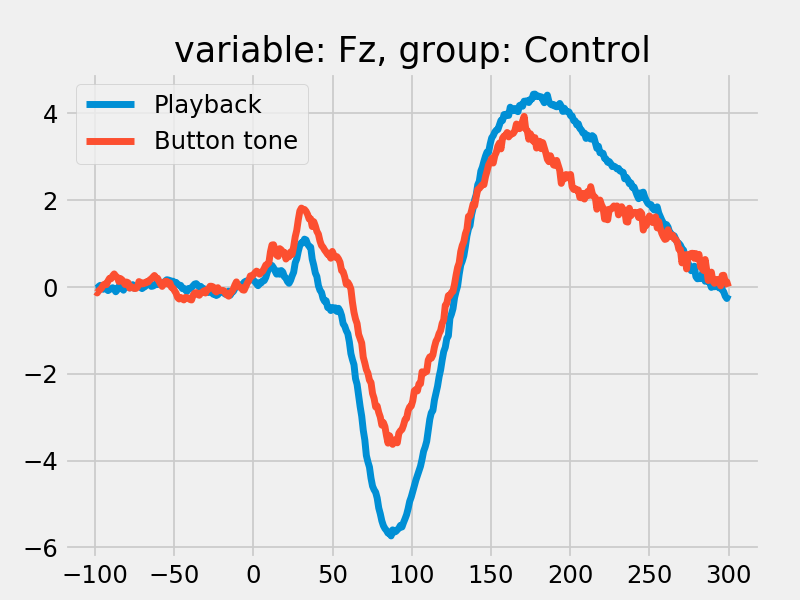

<IPython.core.display.Javascript object>


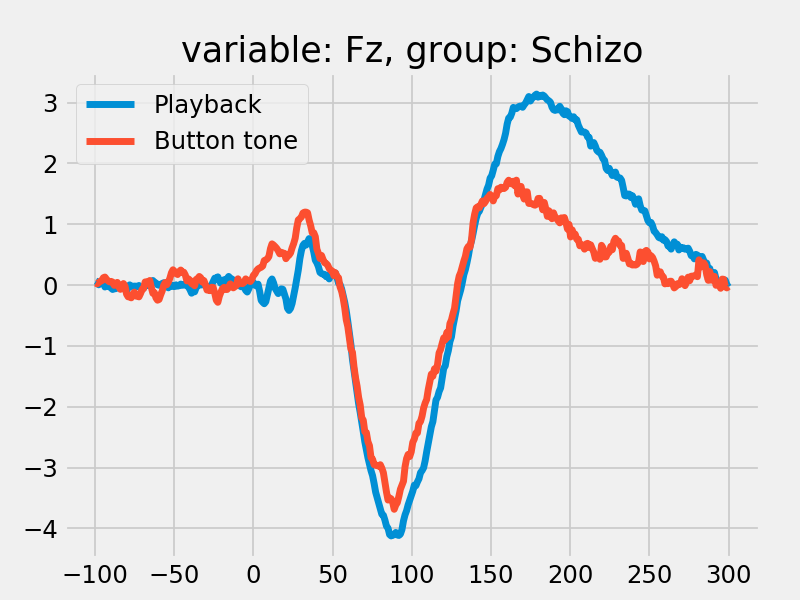

<IPython.core.display.Javascript object>


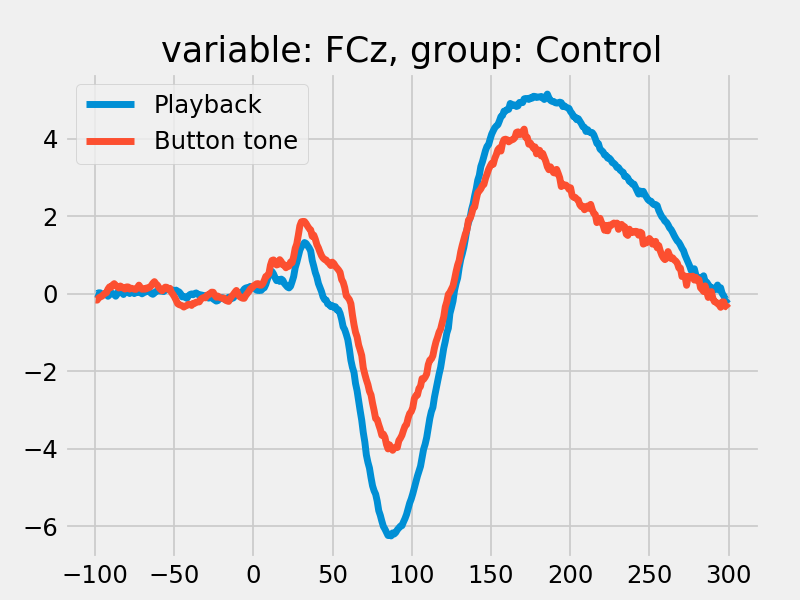

<IPython.core.display.Javascript object>


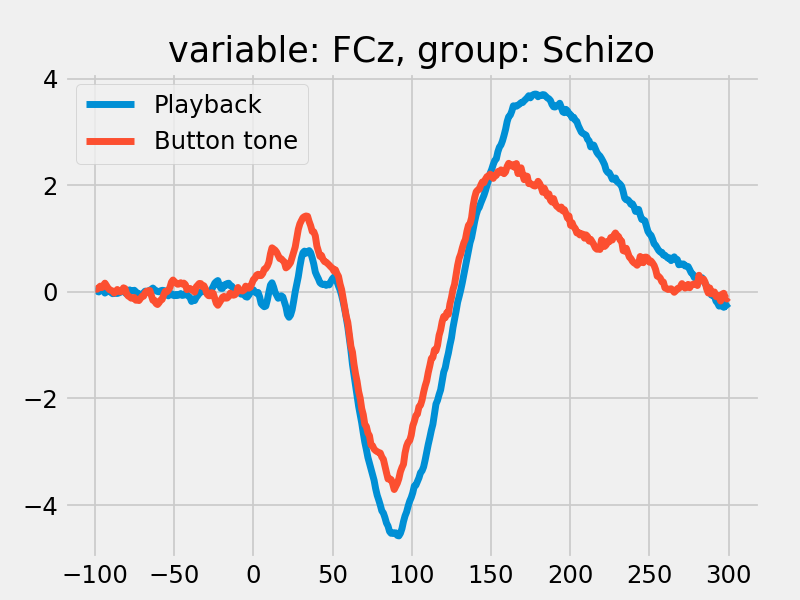

<IPython.core.display.Javascript object>


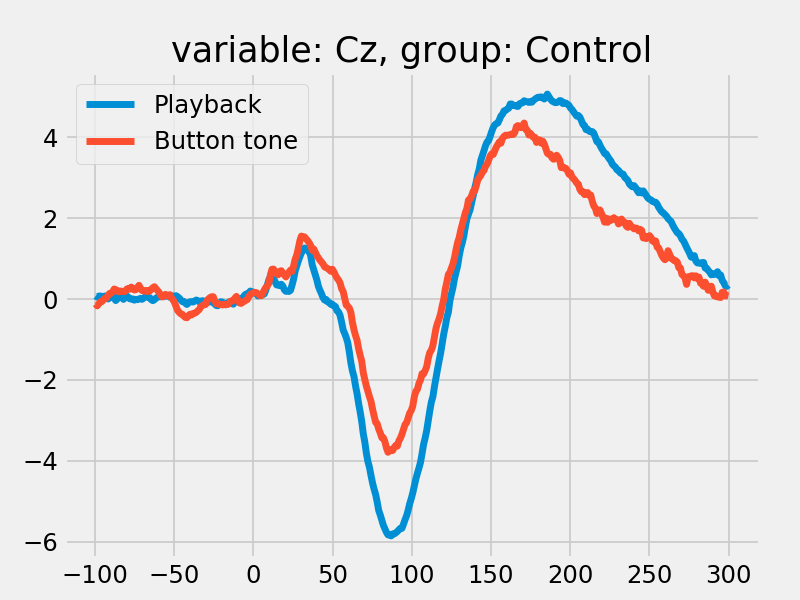

<IPython.core.display.Javascript object>


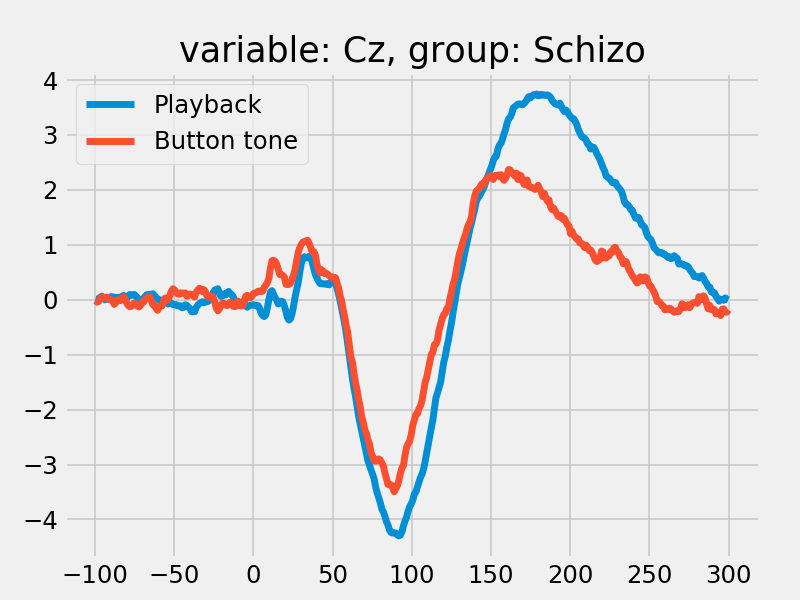

In [53]:
plt.style.use('fivethirtyeight')
ERP['variable'].unique()
PB=ERP[ERP['condition']=='Playback']
BT=ERP[ERP['condition']=='Button tone']
for v in ERP['variable'].unique():
    for g in ERP['group'].unique():
        cond = {'variable': v, 'group': g}
        PBc = PB.loc[(PB['variable'] == cond['variable']) & (PB['group'] == cond['group']), ['time_ms','value']]
        BTc = BT.loc[(BT['variable'] == cond['variable']) & (BT['group'] == cond['group']), ['time_ms','value']]
        plt.figure()
        plt.plot(PBc['time_ms'], PBc['value'])
        plt.plot(BTc['time_ms'], BTc['value'])
        plt.title('variable: {variable}, group: {group}'.format(**cond))
        plt.legend(['Playback','Button tone'])

In [ ]:
# It can be clearly seen that for the control subjects there is a suppression at N1 
# just like in the experiment that we tried to replicate.